In [15]:
head(news)

v1 v2   v3        v4 v5        v6 v7 v8 v9 v10      ⋯ v50        v51
[1,] 12  219 0.6635945 1  0.8153846  4  2  1 0  4.680365 ⋯ 0.10000000 0.7
[2,]  9  255 0.6047431 1  0.7919463  3  1  1 0  4.913725 ⋯ 0.03333333 0.7
[3,]  9  211 0.5751295 1  0.6638655  3  1  1 0  4.393365 ⋯ 0.10000000 1.0
[4,]  9  531 0.5037879 1  0.6656347  9  0  1 0  4.404896 ⋯ 0.13636364 0.8
[5,] 13 1072 0.4156456 1  0.5408895 19 19 20 0  4.682836 ⋯ 0.03333333 1.0
[6,] 10  370 0.5598886 1  0.6981982  2  2  0 0  4.359459 ⋯ 0.13636364 0.6
     v52        v53    v54        v55       v56        v57        v58      
[1,] -0.3500000 -0.600 -0.2000000 0.5000000 -0.1875000 0.00000000 0.1875000
[2,] -0.1187500 -0.125 -0.1000000 0.0000000  0.0000000 0.50000000 0.0000000
[3,] -0.4666667 -0.800 -0.1333333 0.0000000  0.0000000 0.50000000 0.0000000
[4,] -0.3696970 -0.600 -0.1666667 0.0000000  0.0000000 0.50000000 0.0000000
[5,] -0.2201923 -0.500 -0.0500000 0.4545455  0.1363636 0.04545455 0.1363636
[6,] -0.1950000 -0.400 -0.1000000 0.6428571  0.2142857 0.14285714 0.2142857
     v59 
[1,]  593
[2,]  711
[3,] 1500
[4,] 1200
[5,]  505
[6,]  855

In [17]:
news<- read.csv("data/OnlineNewsPopularity/OnlineNewsPopularity.csv", header = T)
news<-news[,-c(1,2)]
dim(news)
colnames(news)<-as.list(paste0("v",1:59))
news<-as.matrix(news)
############################################
#Sample the training and test data sets
set.seed(1)
idx<-sample(dim(news)[1],30000)
train<-news[idx,]
test<-news[-idx,]
############################################
#Mean Absolute Error: Evaluation Rule
eval<- function(x,y)
{
  tmp<- abs(y - x)
  return(sum(tmp)/length(x))
}
pdf("figures.pdf")


[1] 39644    59

In [18]:
news.ols<-lm(v59~.,data=as.data.frame(train))
ols.pre<-predict(news.ols,as.data.frame(test[,1:58]))
ols.eval<-eval(ols.pre, test[, 59])
ols.eval

Warning message in predict.lm(news.ols, as.data.frame(test[, 1:58])):
“prediction from a rank-deficient fit may be misleading”

[1] 3147.012

In [ ]:
install.packages("glmnet")

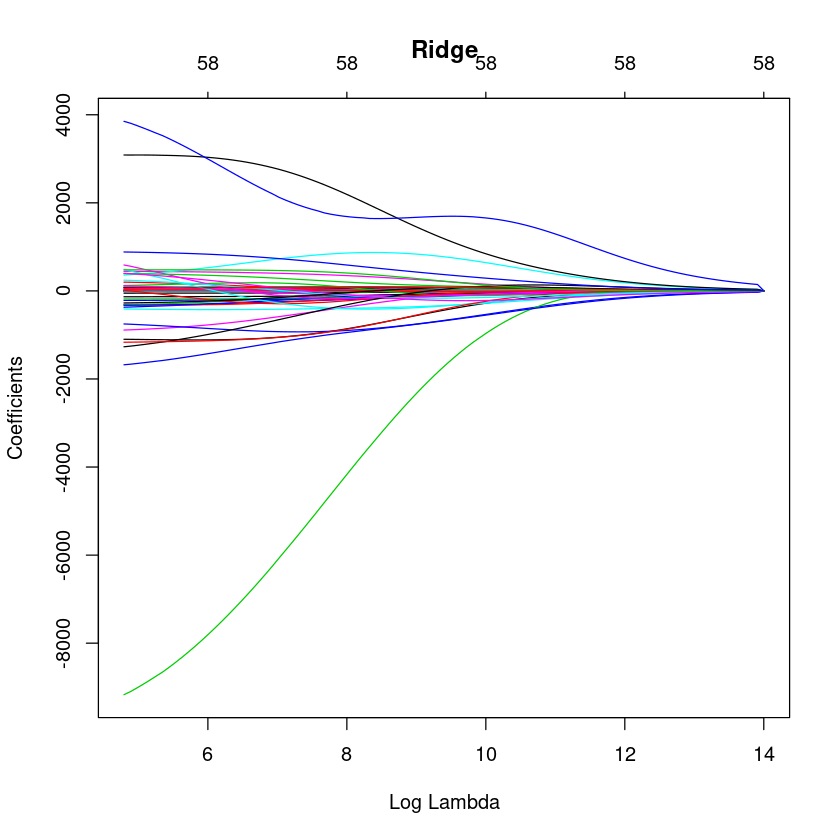

[1] 58

           Length Class  Mode     
lambda     99     -none- numeric  
cvm        99     -none- numeric  
cvsd       99     -none- numeric  
cvup       99     -none- numeric  
cvlo       99     -none- numeric  
nzero      99     -none- numeric  
name        1     -none- character
glmnet.fit 12     elnet  list     
lambda.min  1     -none- numeric  
lambda.1se  1     -none- numeric  


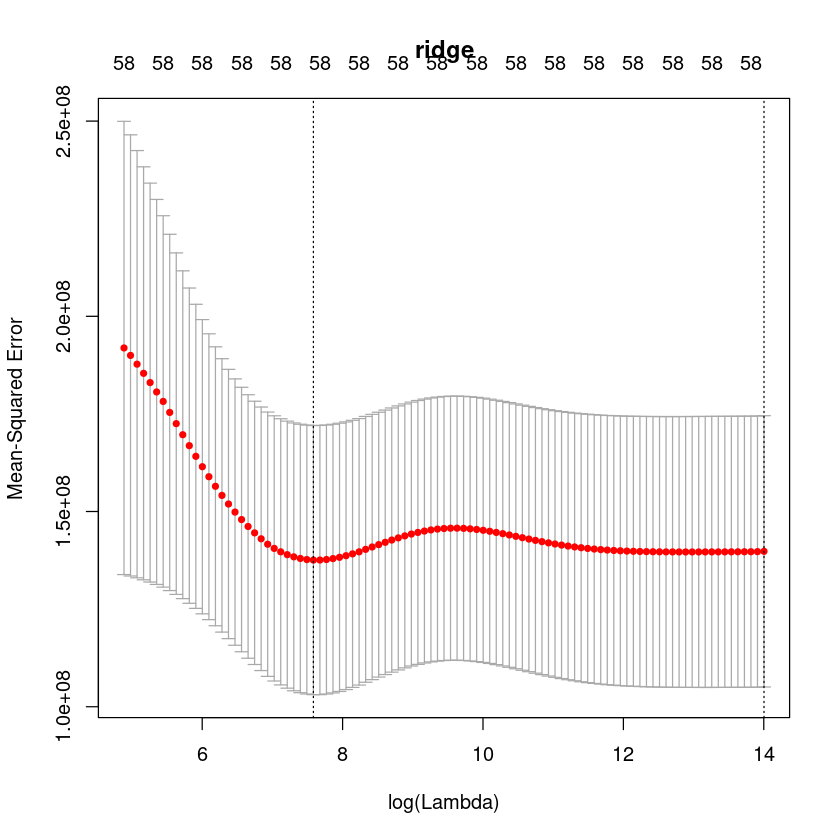

In [21]:
library(glmnet)
newsri<-glmnet(train[,1:58],train[,59],alpha=0)
plot(newsri,xvar="lambda",main="Ridge")
set.seed(1)
news.ridge<-cv.glmnet(train[,1:58],train[,59],alpha=0)
plot(news.ridge,main="ridge")
ridge.coef<-predict(news.ridge,type ="coefficients",s=news.ridge$lambda.min)
length(which(ridge.coef!=0))-1
ridge.pre<-predict(news.ridge,test[,1:58],s=news.ridge$lambda.min)
ridge.eval<-eval(ridge.pre,test[,59])
print(summary(news.ridge))

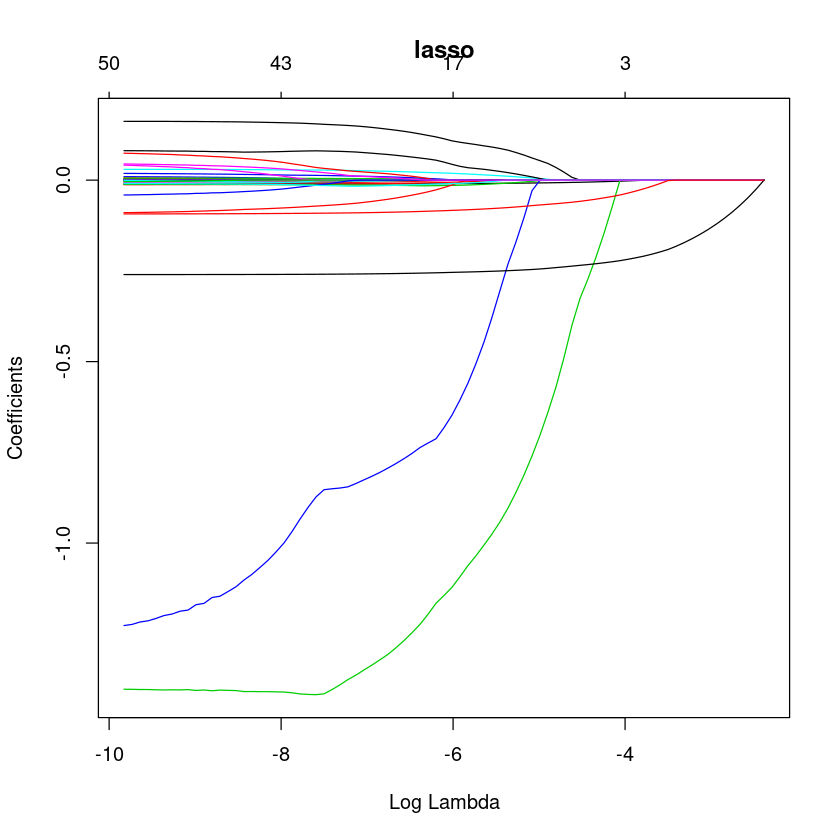

[1] 41

[1] 0.1290506

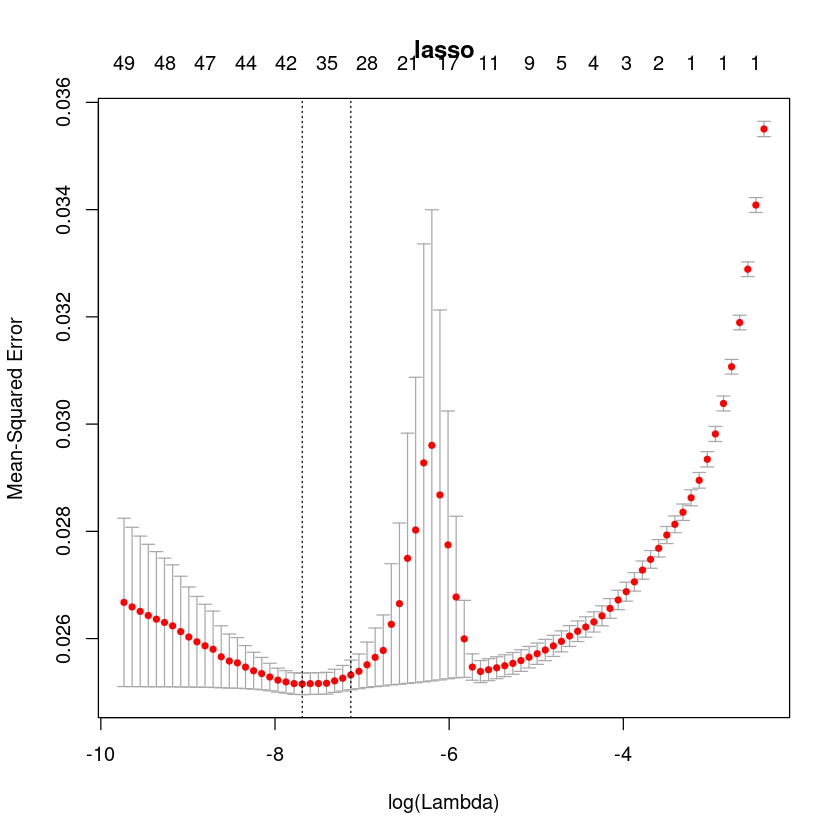

In [22]:
library(glmnet)
newsla<-glmnet(train[,1:56],train[,57],alpha=1)
plot(newsla,xvar="lambda",main="lasso")
set.seed(1)
news.lasso<-cv.glmnet(train[,1:56],train[,57],alpha=1)
plot(news.lasso,main="lasso")
lasso.coef<-predict(news.lasso,type ="coefficients",s=news.lasso$lambda.min)
length(which(lasso.coef!=0))-1
lasso.pre<-predict(news.lasso,test[,1:56],s=news.lasso$lambda.min)
lasso.eval<-eval(lasso.pre,test[,57])
lasso.eval